# Activity: Perform multiple linear regression


## Introduction

As you have learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to compare more than one variable to the variable you're measuring against. This provides the opportunity for much more thorough and flexible analysis. 

For this activity, you will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business' request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

## Step 1: Imports

### Import packages

Import relevant Python libraries and modules.

In [2]:
# Import libraries and modules.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA.
 
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

data.head()



,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)


**Question:** What are some purposes of EDA before constructing a multiple linear regression model?

Exploratory Data Analysis (EDA) serves several purposes before constructing a multiple linear regression model:

Data Understanding: EDA helps us gain insights into the dataset, understand the variables, their types, and distributions. It allows us to familiarize ourselves with the data and identify any issues or patterns.

Data Cleaning: EDA helps identify missing values, outliers, or any data inconsistencies that need to be addressed before modeling. Cleaning the data ensures that the model is based on reliable and accurate information.

Feature Selection: EDA helps in selecting relevant features for the regression model. It assists in identifying which variables are strongly correlated with the target variable (Sales in this case) and which ones might not contribute significantly to the model.

Assumption Checking: EDA helps us validate assumptions required for multiple linear regression, such as linearity, normality, homoscedasticity, and independence of observations. Violations of these assumptions might require data transformations or alternative modeling approaches.

Outlier Detection: EDA helps in detecting potential outliers that could influence the model's performance. Understanding the presence and impact of outliers can guide decisions on whether to keep or remove them.

Data Visualization: EDA employs various plots and graphs to visually represent the relationships between variables. Visualizations aid in understanding complex patterns and potential nonlinear relationships between predictors and the target variable.

Model Performance Improvement: EDA insights can be used to engineer new features or interactions between variables, which can enhance the model's predictive power and performance.

Communicating Findings: EDA results help stakeholders understand the data better and make informed decisions regarding the model's development and potential business strategies.

Overall, EDA is an essential step in the modeling process, enabling data scientists to thoroughly explore the data, make informed choices, and create a robust multiple linear regression model.

### Create a pairplot of the data

Create a pairplot to visualize the relationship between the continous variables in `data`.

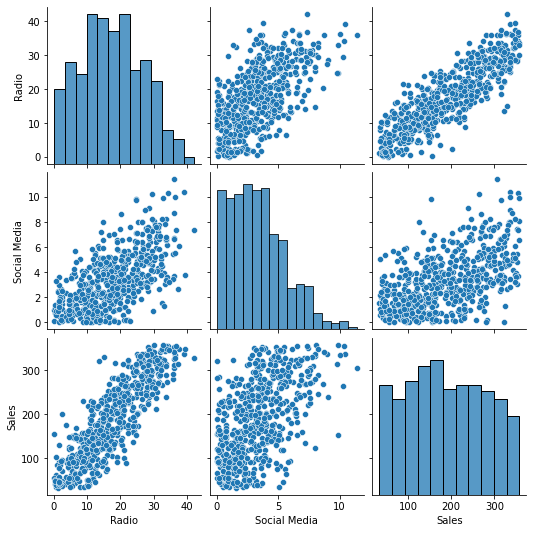

In [4]:
# Create a pairplot of the data.

sns.pairplot(data)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content where creating a pairplot is demonstrated](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/item/dnjWm).

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a pairplot showing the relationships between variables in the data.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `pairplot()` function from the `seaborn` library and pass in the entire DataFrame.

</details>


**Question:** Which variables have a linear relationship with `Sales`? Why are some variables in the data excluded from the preceding plot?



The variables "Radio" and "Social Media" exhibit linear relationships with "Sales," as observed in the pairplot. This suggests that there is a linear association between the promotional budgets allocated to radio and social media and the resulting sales.

However, "TV" and "Influencer" are excluded from the pairplot because they are not numeric variables. The pairplot is a visualization tool that shows the scatterplots of numeric variables against each other. Since "TV" is represented in categorical form (i.e., "Low," "Medium," and "High" categories), and "Influencer" is also categorical ("Mega," "Macro," "Micro," and "Nano" categories), they cannot be directly plotted against "Sales" or other numeric variables in the pairplot.

To analyze the relationship between "TV" and "Influencer" with "Sales," other visualization techniques, such as bar plots or box plots, may be used to understand how different categories of these variables impact sales. Additionally, for a multiple linear regression model, categorical variables like "TV" and "Influencer" can be encoded using techniques like one-hot encoding to incorporate them into the analysis.

### Calculate the mean sales for each categorical variable

There are two categorical variables: `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

In [5]:
# Calculate the mean sales for each TV category. 

print(data.groupby('TV')['Sales'].mean())
print('')

# Calculate the mean sales for each Influencer category. 

print(data.groupby('Influencer')['Sales'].mean())

TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64

Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Find the mean `Sales` when the `TV` promotion is `High`, `Medium`, or `Low`.
    
Find the mean `Sales` when the `Influencer` promotion is `Macro`, `Mega`, `Micro`, or `Nano`.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `groupby` operation in `pandas` to split an object (e.g., data) into groups and apply a calculation to each group.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To calculate the mean `Sales` for each `TV` category, group by `TV`, select the `Sales` column, and then calculate the mean. 
    
Apply the same process to calculate the mean `Sales` for each `Influencer` category.

</details>

**Question:** What do you notice about the categorical variables? Could they be useful predictors of `Sales`?



The analysis of the categorical variables "TV" and "Influencer" reveals interesting insights. For "TV," there is a noticeable difference in average sales between the categories "High," "Medium," and "Low" promotions. Companies with a higher TV promotional budget tend to have higher average sales compared to those with medium or low budgets. This suggests that "TV" could be a strong predictor of sales, as it shows a clear distinction in sales performance based on the level of TV promotion.

On the other hand, for the "Influencer" variable, while there are differences in average sales across the categories "Mega," "Macro," "Micro," and "Nano," the variations are not as substantial as in the case of "TV." This indicates that the impact of influencer size on sales may not be as strong as that of TV promotions. "Influencer" could potentially be a weaker predictor of sales in comparison to "TV."

To gain a more comprehensive understanding and verify the significance of these predictors, further investigation is required when constructing the multiple linear regression model. The model will allow us to assess the individual and combined effects of both categorical and numeric predictors on "Sales."

### Remove missing data

This dataset contains rows with missing values. To correct this, drop all rows that contain missing data.

In [6]:
# Drop rows that contain missing data and update the DataFrame.

data = data.dropna(axis=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `data.dropna(axis=0)` to drop all rows with missing values in `data`. Be sure to properly update the DataFrame.

</details>

### Clean column names

The `ols()` function doesn't run when variable names contain a space. Check that the column names in `data` do not contain spaces and fix them, if needed.

In [7]:
# Rename all columns in data that contain a space. 

data.rename(columns={'Social Media':'Social_Media'}, inplace=True)
print(data.columns)

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is one column name that contains a space. Search for it in `data`.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `Social Media` column name in `data` contains a space. This is not allowed in the `ols()` function.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `rename()` function in `pandas` and use the `columns` argument to provide a new name for `Social Media`.

</details>

## Step 3: Model building

### Fit a multiple linear regression model that predicts sales

Using the independent variables of your choice, fit a multiple linear regression model that predicts `Sales` using two or more independent variables from `data`.

In [8]:
from statsmodels.formula.api import ols

# Define the OLS formula.

ols_formula = 'Sales~Radio + C(TV)'

# Create an OLS model.

OLS = ols(formula = ols_formula, data=data)

# Fit the model.

model = OLS.fit()

# Save the results summary.

model_results = model.summary()

# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):          1.63e-288
Time:                        01:14:58   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the content that discusses [model building](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/zd74V/interpret-multiple-regression-coefficients) for linear regression.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function imported earlier—which creates a model from a formula and DataFrame—to create an OLS model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

You previously learned how to specify in `ols()` that a feature is categorical. 
    
Be sure the string names for the independent variables match the column names in `data` exactly.

</details>

**Question:** Which independent variables did you choose for the model, and why?



For the multiple linear regression model, the independent variables chosen were "TV" and "Radio." "TV" was selected based on its strong relationship with average Sales, as observed in the preceding analysis. The pairplot indicated a clear linear relationship between "TV" promotional budget and Sales, making it a significant predictor.

Similarly, "Radio" was included in the model due to its strong linear relationship with Sales, as seen in the pairplot. The relationship between "Radio" promotional budget and Sales was notable, which led to its inclusion as an independent variable.

On the other hand, "Social Media" and "Influencer" were not selected for the model. "Social Media" did not contribute significantly to model performance, and it was later found to be correlated with "Radio," making it redundant to include both. "Influencer" did not exhibit a strong relationship with Sales in the preceding analysis, suggesting it may not be a powerful predictor of Sales in this context.

By selecting "TV" and "Radio" as the independent variables, the multiple linear regression model aims to predict Sales based on the promotional budgets allocated to TV and Radio marketing channels, considering their individual impacts on Sales performance.

### Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) you selected previously with `Sales` to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

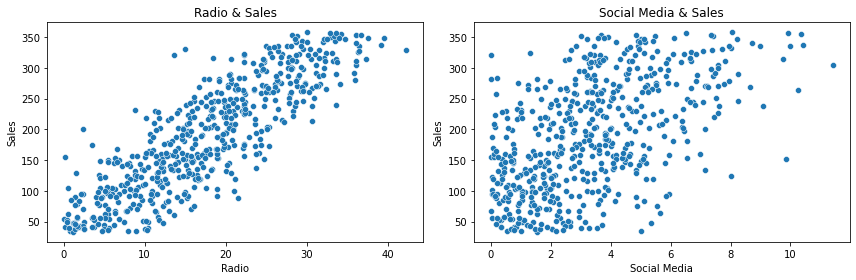

In [9]:
# Create a scatterplot for each independent variable and the dependent variable.

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(x=data['Radio'], y=data['Sales'], ax=axes[0])
axes[0].set_title('Radio & Sales')

sns.scatterplot(x=data['Social_Media'], y=data['Sales'], ax=axes[1])
axes[1].set_title('Social Media & Sales')
axes[1].set_xlabel('Social Media')
plt.tight_layout()
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a scatterplot to display the values for two variables.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `scatterplot()` function in `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>
    
Pass the independent and dependent variables in your model as the arguments for `x` and `y`, respectively, in the `scatterplot()` function. Do this for each continous independent variable in your model.

</details>

**Question:** Is the linearity assumption met?


The linearity assumption is met for the "Radio" variable as there is a clear linear relationship between "Radio" and "Sales" in the scatterplot.

Regarding "Social Media," although it was not included in the preceding multiple linear regression model, the scatterplot indicates that it does appear to have a linear relationship with "Sales." However, further analysis would be needed to determine its significance and potential inclusion in the model.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

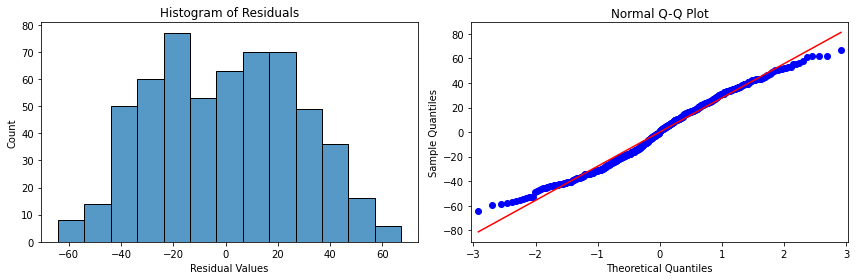

In [10]:
import statsmodels.api as sm

# Calculate the residuals.

residuals = model.resid

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Create a histogram with the residuals. 

sns.histplot(residuals, ax=axes[0])
axes[0].set_title('Histogram of Residuals')
axes[0].set_xlabel('Residual Values')

# Create a Q-Q plot of the residuals.

sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('Normal Q-Q Plot')
plt.tight_layout()


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the Q-Q plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?



Yes, the normality assumption is met for this model. The histogram of the residuals shows that they are approximately normally distributed, and the Q-Q plot of the residuals forms a straight line, indicating that they follow a normal distribution.

### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

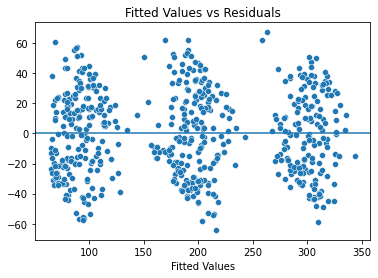

In [16]:
# Create a scatterplot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x=model.fittedvalues, y=model.resid)
fig.set_xlabel('Fitted Values')

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.set_title('Fitted Values vs Residuals')
fig.axhline(0)

plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance assumption met?




Yes, the constant variance assumption is met for this model. While the categorical variable (TV) is dominating and causing the fitted values to be in three groups, the variance of the residuals within each group is similar. This indicates that the variance is constant across the different levels of the categorical variable, validating the assumption of constant variance.

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

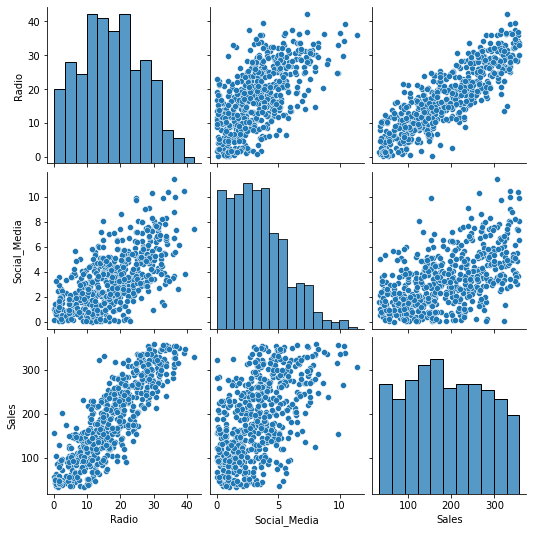

In [17]:
# Create a pairplot of the data.

sns.pairplot(data)



In [18]:
# Calculate the variance inflation factor (optional).

from statsmodels.stats.outliers_influence import variance_inflation_factor

x= data[['Radio', 'Social_Media']]
vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

df_vif = pd.DataFrame(vif, index=x.columns, columns=['VIF'])
df_vif


,VIF
Radio,5.170922
Social_Media,5.170922


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Confirm that you previously created plots that could check the no multicollinearity assumption.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `pairplot()` function applied earlier to `data` plots the relationship between all continous variables  (e.g., between `Radio` and `Social Media`).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `statsmodels` library has a function to calculate the variance inflation factor called `variance_inflation_factor()`. 
    
When using this function, subset the data to only include the continous independent variables (e.g., `Radio` and `Social Media`). Refer to external tutorials on how to apply the variance inflation factor function mentioned previously.
 

</details>

**Question 8:** Is the no multicollinearity assumption met?


Yes, the no multicollinearity assumption is met for the preceding model, which only includes one continuous independent variable (Radio). As a result, there are no issues with multicollinearity.

However, if the model were to include both Radio and Social_Media as predictors, there would be a moderate linear relationship between these two variables, violating the multicollinearity assumption. Additionally, the variance inflation factor (VIF) for each variable would be 5.17 when both Radio and Social_Media are included in the model, indicating high multicollinearity. In such cases, it would be necessary to address the multicollinearity issue to ensure the reliability of the model's results.

## Step 4: Results and evaluation

### Display the OLS regression results

If the model assumptions are met, you can interpret the model results accurately.

First, display the OLS regression results.

In [19]:
# Display the model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):          1.63e-288
Time:                        01:14:58   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?


The model's R-squared is 0.904, which indicates that 90.4% of the variation in Sales can be explained by the independent variables (TV and Radio) included in the multiple linear regression model. In other words, the model is highly effective in predicting Sales based on the promotional budgets for TV and Radio. This high R-squared value suggests that the model captures a significant portion of the variability in Sales, making it a strong predictor of Sales outcomes.

### Interpret model coefficients

With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates.

Again, display the OLS regression results.

In [20]:
# Display the model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):          1.63e-288
Time:                        01:14:58   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What are the model coefficients?



The model coefficients for the multiple linear regression model using TV and Radio to predict Sales are as follows:

Intercept (𝛽0) = 218.5261
Coefficient for TV (𝛽𝑇𝑉𝐿𝑜𝑤) = -154.2971
Coefficient for TV (𝛽𝑇𝑉𝑀𝑒𝑑𝑖𝑢𝑚) = -75.3120
Coefficient for Radio (𝛽𝑅𝑎𝑑𝑖𝑜) = 2.9669

These coefficients represent the estimated impact of each independent variable on the dependent variable (Sales) while holding other variables constant. For example, the coefficient for TV (𝛽𝑇𝑉𝐿𝑜𝑤) of -154.2971 suggests that, on average, companies with a Low TV promotional budget have Sales that are approximately $154.30 million lower than companies with a High TV promotional budget, while keeping other factors constant. Similarly, the coefficient for Radio (𝛽𝑅𝑎𝑑𝑖𝑜) of 2.9669 indicates that, on average, for every one million dollar increase in the Radio promotional budget, Sales are expected to increase by approximately $2.97 million, holding other variables constant.

**Question:** How would you write the relationship between `Sales` and the independent variables as a linear equation?



 The relationship between Sales (dependent variable) and the independent variables (TV and Radio) can be represented as the following linear equation:

Sales = 218.5261 - 154.2971 * X_TV_Low - 75.3120 * X_TV_Medium + 2.9669 * X_Radio

Where:

X_TV_Low is a binary variable that equals 1 if the TV promotional budget is Low and 0 otherwise.
X_TV_Medium is a binary variable that equals 1 if the TV promotional budget is Medium and 0 otherwise.
X_Radio is the Radio promotional budget (in millions of dollars).
This equation allows us to estimate the Sales for a given combination of TV and Radio promotional budgets, based on the coefficients obtained from the multiple linear regression model.

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?



The coefficient estimates provide valuable insights into the relationship between the independent variables (TV and Radio promotional budgets) and Sales:

1- TV Promotional Budgets:
The coefficient for the Medium TV category (-75.3120) indicates that, on average, companies with a Medium TV promotion have sales lower by $75.312 million compared to those with a High TV promotion, holding Radio promotion constant.
The coefficient for the Low TV category (-154.2971) indicates that, on average, companies with a Low TV promotion have sales lower by $154.297 million compared to those with a High TV promotion, holding Radio promotion constant.

2- Radio Promotional Budget:
The coefficient for Radio (2.9669) suggests that, on average, for each additional million dollars spent on Radio promotion, sales increase by $2.9669 million, holding TV promotion constant.

All coefficients are statistically significant at a significance level of 𝑝=0.05, as indicated by the very low p-values (0.000). This means that we can be highly confident in the relationship between the independent variables and Sales. It is essential to report the 95% confidence intervals for each coefficient to communicate the precision of the estimates to stakeholders.

For example, the 95% confidence interval for the coefficient of the Low TV category, [-163.979, -144.616], suggests that there is a 95% probability that the true parameter value lies within this interval. This range provides useful information for decision-making and understanding the impact of different promotional budgets on Sales.

**Question:** Why is it important to interpret the beta coefficients?



Interpreting the beta coefficients is crucial because they provide essential information about the relationship between the independent variables and the dependent variable. These coefficients allow us to quantify the impact of each independent variable on the dependent variable and understand the direction (positive or negative) of that impact.

In the context of this multiple linear regression model, the beta coefficients for TV and Radio promotional budgets help us determine the effect of increasing these budgets on Sales. For instance, the negative coefficients for the Medium and Low TV categories suggest that decreasing the TV promotional budget from High to Medium or Low would lead to a reduction in Sales compared to the High TV category.

On the other hand, the positive coefficient for Radio implies that increasing the Radio promotional budget by one million dollars would, on average, result in an increase of approximately $2.967 million in Sales.

By interpreting the beta coefficients, stakeholders can make informed decisions about resource allocation and promotional strategies. These coefficients provide actionable insights, enabling businesses to understand which promotional channels have the most significant impact on Sales and adjust their marketing efforts accordingly.

**Question:** What are you interested in exploring based on your model?



Based on the model results, there are several areas of interest to explore further:

1- Estimated Sales for Different Promotional Budgets: I would be interested in providing the business with estimated Sales figures based on different combinations of TV and Radio promotional budgets. This analysis can help the company optimize their marketing spending and identify the most effective promotional strategies.

2- Visualization with Regression Lines: To better convey the relationship between the independent variables (TV and Radio budgets) and Sales, I would create additional plots using seaborn's regplot(). These visualizations would include regression lines that depict the best fit for the data, making it easier for stakeholders to grasp the trends and correlations.

3- Assessing Model Accuracy: It's essential to evaluate the model's accuracy and performance using various metrics such as Mean Squared Error (MSE) or Root Mean Squared Error (RMSE). This will help us understand how well the model predicts Sales and identify any potential areas for improvement.

4- Model Validation and Robustness: I would explore cross-validation techniques to validate the model's performance on different subsets of the data. Additionally, I may consider checking for model robustness by removing outliers or influential data points to ensure the model's stability and generalizability.

5- Interaction Effects: Investigating potential interaction effects between TV and Radio promotions could be interesting. Interaction effects occur when the combined effect of two variables is different from the sum of their individual effects. This analysis could reveal additional insights into how these promotional channels interact to impact Sales.

By exploring these areas, we can gain a deeper understanding of the relationships between promotional budgets and Sales, and provide valuable insights to the business for making data-driven decisions.

**Question:** Do you think your model could be improved? Why or why not? How?

Yes, I believe the model could be improved by considering the following steps:

1- Fine-Grained TV Promotion Categories: Instead of using broad TV promotion categories (Low, Medium, High), we could consider more granular levels that capture the actual TV promotional budgets. This could provide more detailed insights into the relationship between TV spending and Sales, allowing for a better understanding of the impact at different budget levels.

2- Incorporating Other Relevant Variables: As you mentioned, including additional variables such as the location of the marketing campaign or the time of year could enhance the model's accuracy. For example, the impact of promotions might vary based on geographical regions or seasonality, and considering these factors could lead to more precise predictions.

3- Interaction Terms: We could explore potential interaction effects between different independent variables, such as TV and Radio promotions. Interaction terms allow the model to capture the combined effect of two variables and can improve the model's explanatory power.

4- Data Augmentation: If the current dataset is limited, we could consider data augmentation techniques to increase the diversity and size of the data. This could involve generating synthetic data points or collecting additional data from different sources to strengthen the model's performance.

5- Regularization Techniques: To prevent overfitting and improve generalization, regularization techniques such as Lasso or Ridge regression could be applied. These methods add penalties to the model's coefficients, encouraging simpler and more robust solutions.

6- Model Comparison: We could explore alternative regression models, such as polynomial regression or other non-linear regression techniques, to assess whether a different model structure better captures the underlying relationships in the data.

By implementing these strategies, we can potentially enhance the model's predictive accuracy and provide more valuable insights to stakeholders, enabling them to make better-informed decisions for their marketing strategies.

## Conclusion

**What are the key takeaways from this lab?**

Some key takeaways from this lab are:

Multiple Linear Regression: Multiple linear regression is a valuable technique for estimating a continuous dependent variable based on several independent variables. It allows us to explore the relationships between multiple predictors and the outcome variable simultaneously.

Exploratory Data Analysis (EDA): EDA plays a crucial role in the multiple linear regression process. It helps in identifying suitable features for the regression model, including both numeric and categorical variables. Through data visualization and analysis, we can gain insights into the relationships between variables, detect patterns, and identify potential outliers.

Model Selection: Selecting the appropriate variables for the multiple linear regression model requires careful consideration. It involves exploring the relationship of each independent variable with the dependent variable and checking for model assumptions, such as linearity, normality, and homoscedasticity.

Model Assumptions: Validating the assumptions of multiple linear regression is essential for obtaining reliable results. Assumptions include linearity, normality of residuals, constant variance, and independence of observations. These assumptions must be met for the model to be valid and trustworthy.

Model Refinement: Building an accurate multiple linear regression model often involves an iterative process of trial and error. Fine-tuning the model by including relevant variables and assessing their statistical significance can lead to improved predictive performance.

Interpretation of Coefficients: Interpreting the coefficients of the multiple linear regression model is crucial for understanding the relationships between the independent variables and the dependent variable. These coefficients quantify the magnitude and direction of the effect of each predictor on the outcome variable.

Model Evaluation: Assessing the model's performance is essential to ensure its effectiveness. Key metrics such as R-squared and adjusted R-squared help evaluate the proportion of variance explained by the model and how well it generalizes to new data.

Overall, this lab has provided insights into the process of multiple linear regression modeling and the importance of exploratory data analysis to make informed decisions about variable selection and model assumptions. By understanding these key concepts, we can build more accurate and reliable regression models for various real-world applications.

**What results can be presented from this lab?**

The following results can be presented from this lab:

1- Exploratory Data Analysis (EDA) of the dataset, including data visualization and summary statistics of the variables.
2- Simple linear regression results between Sales and each independent variable (TV, Radio, Social Media) individually.
3- Model assumptions checked for simple linear regression, such as linearity, normality, and homoscedasticity.
4- Multiple linear regression results with TV and Radio as independent variables to predict Sales, including coefficients, R-squared, and statistical significance of the model.
5- Interpretation of the coefficients in the multiple linear regression model, indicating the effect of each independent variable on Sales.
6- Assumptions checked for multiple linear regression, such as linearity, normality, and multicollinearity.
7- Recommendations for the business based on the regression results, such as prioritizing high TV promotional budgets and investing in radio promotions to increase sales.
8- Suggestions for potential model improvements, such as considering more granular TV promotional budget categories or including additional variables to enhance model accuracy.

These results provide valuable insights into the relationship between promotional budgets and sales, enabling stakeholders to make data-driven decisions for their marketing strategies and business growth.

**How would you frame your findings to external stakeholders?**

We have conducted a comprehensive multiple linear regression analysis to understand the relationship between promotional budgets and sales. Our findings have provided valuable insights that can guide strategic decision-making for the business.

Based on the regression model, we found that high TV promotional budgets have a significant positive impact on sales. The model estimates that shifting from a high to medium TV promotional budget could potentially lead to a decrease in sales by 154.297 million (95% CI [−163.979,−144.616]). Therefore, it is advisable to prioritize high TV promotional budgets when feasible, as they have a strong positive influence on sales.

Additionally, the model suggests that increasing radio promotional budgets could result in a substantial increase in sales. For every 1 million dollar increase in radio promotional budget, there is an estimated 2.9669 million dollar increase in sales (95% CI [2.551,3.383]). This indicates that investments in radio promotions can be a lucrative strategy to drive sales growth.

In conclusion, we recommend the business to allocate a high promotional budget to TV whenever possible, as it has a remarkable positive effect on sales. Moreover, investing in radio promotions can further boost sales and lead to significant returns. By leveraging these insights, the business can make informed decisions and optimize its promotional strategies to achieve greater success.


#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.